Task 3: Customer Segmentation / Clustering

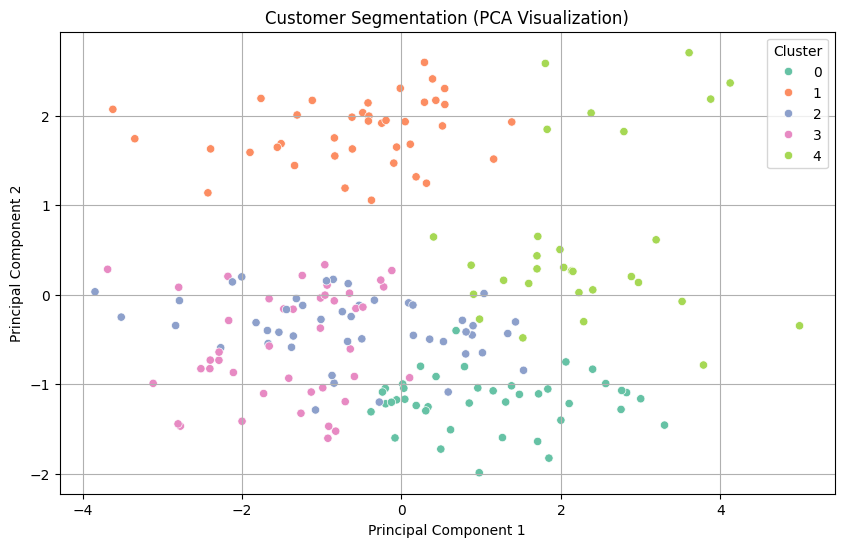

Number of Clusters: 5
Davies-Bouldin Index: 1.17


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets to include transaction information in the customer profiles
merged = pd.merge(transactions, customers, on="CustomerID")

# Aggregate transaction data per customer
customer_data = (
    merged.groupby("CustomerID")
    .agg(
        TotalSpent=("TotalValue", "sum"),
        AvgSpent=("TotalValue", "mean"),
        TotalQuantity=("Quantity", "sum"),
        TransactionCount=("TransactionID", "count"),
    )
    .reset_index()
)

# Add customer profile data (e.g., region)
customer_data = pd.merge(customer_data, customers, on="CustomerID")

# Encode categorical variables (e.g., region)
customer_data = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data.drop(["CustomerID", "CustomerName", "SignupDate"], axis=1))

# Perform KMeans clustering
num_clusters = 5  # You can try values between 2 and 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_data["Cluster"])

# Visualize clusters using the first two principal components (PCA for dimensionality reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_data["PCA1"] = pca_features[:, 0]
customer_data["PCA2"] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Set2",
    data=customer_data,
    legend="full",
)
plt.title("Customer Segmentation (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Save clustering results
customer_data[["CustomerID", "Cluster"]].to_csv("Chukka_DhanyaDeepika_Clustering.csv", index=False)

# Print clustering metrics and results
print(f"Number of Clusters: {num_clusters}")
print(f"Davies-Bouldin Index: {db_index:.2f}")